<a href="https://colab.research.google.com/github/Vatsal-Patel-09/Machine_Learning_101/blob/main/LAB_4_updated_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 4: Exploratory Data Analysis, Feature Engineering, and Feature Selection

#### Dataset

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = sns.load_dataset('titanic')

## Exercise1: Exploratory Data Analysis (EDA)

#### Step 1: Basic Understanding
- Use df.info() and df.describe() to understand the structure and summary
- Display column types and count of missing values

In [66]:
print(df.info())
print(df.describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
<bound method NDFrame.describe of      survived  pclass     sex   age  sib

In [67]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


#### Step 2: Identify Attribute Types
 - Manually classify the following attributes:
  - Categorical
  - Numerical
  - Target

#### Step 3: Understand Distribution of Attributes
-  Compute: mean, median, std, quartiles for age, fare, parch
- Plot:
  - Histogram and Boxplot for age, fare  
  - Countplot for sex, embarked, class

In [68]:
# Compute: mean, median, std, quartiles for age, fare, parch
for x in ['age', 'fare', 'parch']:
  print(x)
  print("Mean: ",df[x].mean())
  print("Median: ",df[x].median())
  print("Std: ",df[x].std())
  print("Quantile Q1: ",df[x].quantile(0.25))
  print("Quantile Q2: ",df[x].quantile(0.5))
  print("Quantile Q3: ",df[x].quantile(0.75))
  print ("\n")

age
Mean:  29.69911764705882
Median:  28.0
Std:  14.526497332334044
Quantile Q1:  20.125
Quantile Q2:  28.0
Quantile Q3:  38.0


fare
Mean:  32.204207968574636
Median:  14.4542
Std:  49.693428597180905
Quantile Q1:  7.9104
Quantile Q2:  14.4542
Quantile Q3:  31.0


parch
Mean:  0.38159371492704824
Median:  0.0
Std:  0.8060572211299559
Quantile Q1:  0.0
Quantile Q2:  0.0
Quantile Q3:  0.0




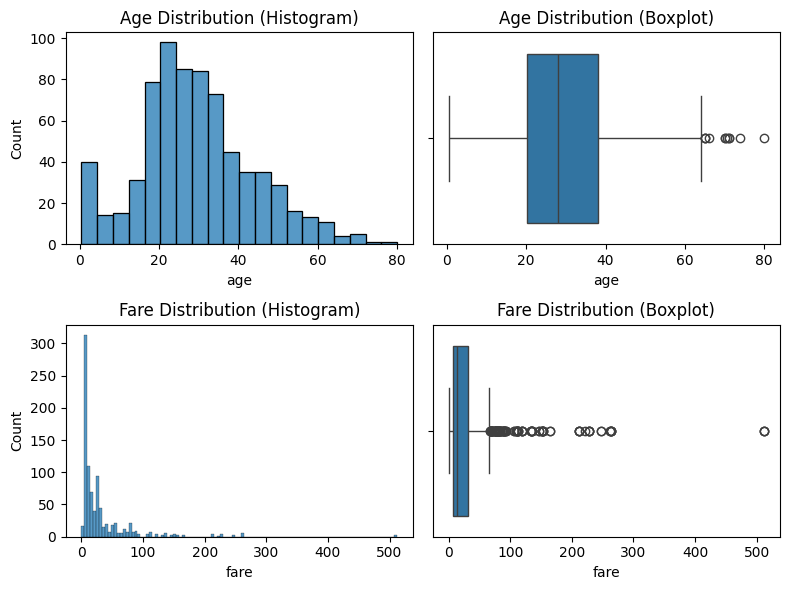

In [69]:
#Histogram and Boxplot for age, fare
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

sns.histplot(df['age'], ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution (Histogram)')

sns.boxplot(x=df['age'], ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution (Boxplot)')

sns.histplot(df['fare'], ax=axes[1, 0])
axes[1, 0].set_title('Fare Distribution (Histogram)')

sns.boxplot(x=df['fare'], ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution (Boxplot)')

plt.tight_layout()
plt.show()

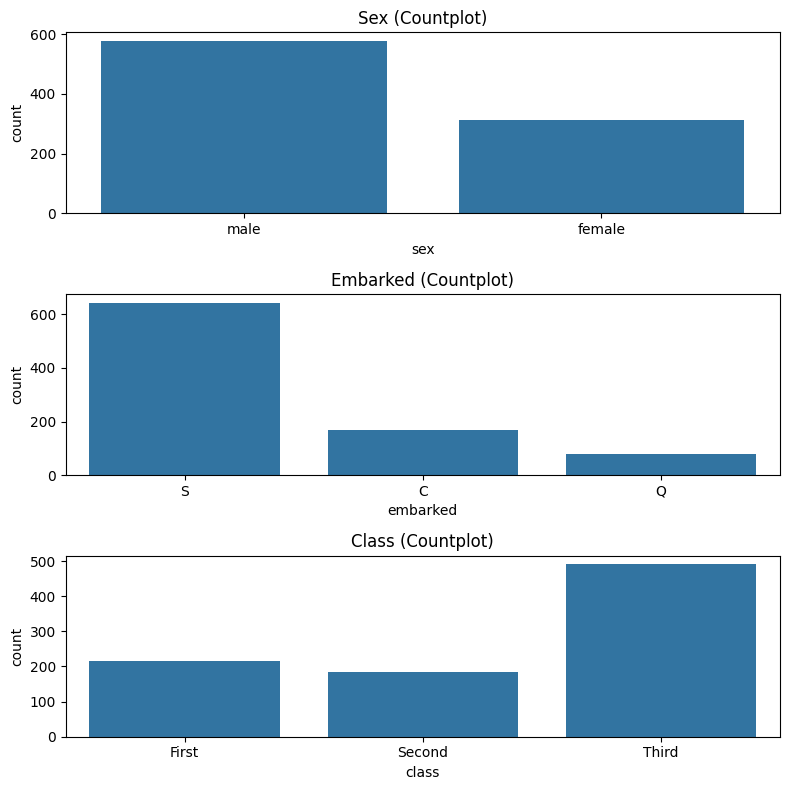

In [70]:
# Countplot for sex, embarked, class

fig, axes = plt.subplots(3, 1, figsize=(8, 8))

sns.countplot(x='sex', data=df, ax=axes[0])
axes[0].set_title('Sex (Countplot)')

sns.countplot(x='embarked', data=df, ax=axes[1])
axes[1].set_title('Embarked (Countplot)')

sns.countplot(x='class', data=df, ax=axes[2])
axes[2].set_title('Class (Countplot)')

plt.tight_layout()
plt.show()

#### Step 4: Understand Relationships Among Attributes
- Plot scatterplot between age and fare
- Compute and visualize Pearson correlation matrix for age, fare, parch, sibsp
- Use pd.crosstab() between:
  - sex vs survived
  - embarked vs class

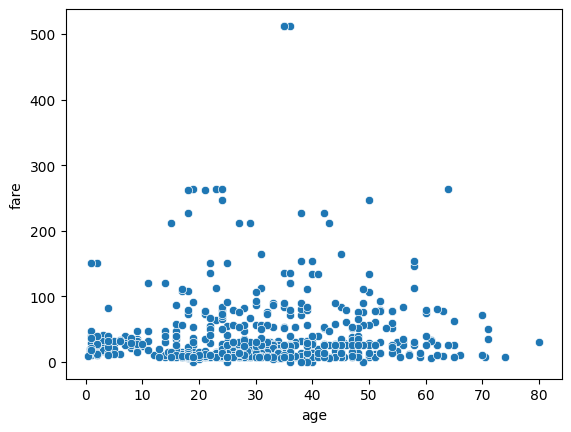

In [71]:
# Plot scatterplot between age and fare
sns.scatterplot(x=df['age'], y = df["fare"])
plt.show()

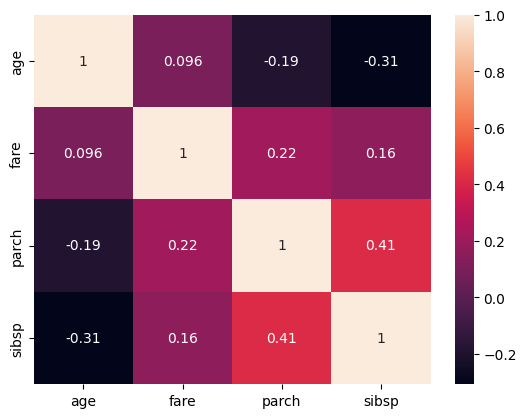

In [72]:
# Compute and visualize Pearson correlation matrix for age, fare, parch, sibsp
correlation = df[['age', 'fare', 'parch', 'sibsp']].corr()
sns.heatmap(correlation, annot=True)
plt.show()

In [73]:
#Use pd.crosstab() between:
#  - sex vs survived
print("sex vs survived")
pd.crosstab(df['sex'], df['survived'])

sex vs survived


survived,0,1
sex,,
female,81,233
male,468,109


In [74]:
#  - embarked vs class
print("embarked vs class")
pd.crosstab(df['embarked'], df['class'])

embarked vs class


class,First,Second,Third
embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


## Exercise2: Feature Engineering

#### Step 1: Missing Value Handling
- Impute:
  - age with median
  - embarked with mode
  - Drop rows where deck is null

In [75]:
# age with median
df['age'].fillna(df['age'].median(), inplace=True)
# print(df['age'])
# print(df['age'].median())

/tmp/ipython-input-3938190663.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [76]:
# embarked with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# print(df['embarked'])
# print(df['embarked'].mode()[0])

/tmp/ipython-input-3595710167.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


In [77]:
# Drop rows where deck is null
df.dropna(subset=['deck'], inplace=True)
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64


#### Step 2: Outlier Detection and Handling
- Plot boxplot and detect outliers in fare
- Cap outliers using IQR method

<Axes: ylabel='fare'>

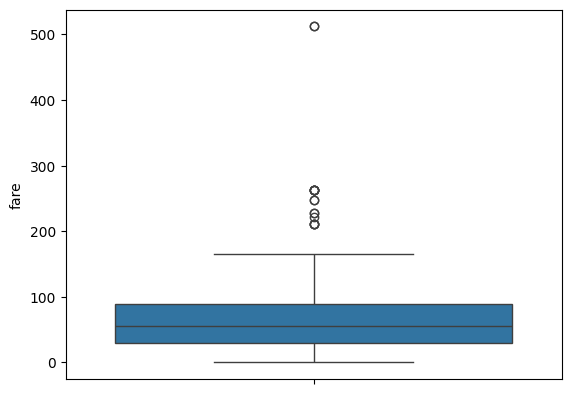

In [78]:
# Plot boxplot and detect outliers in fare
sns.boxplot(y=df['fare'])

In [79]:
# Cap outliers using IQR method
df = sns.load_dataset('titanic')
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print("Values:","\n Q1: ", Q1,"\n Q3: ", Q3,"\n IQR: ", IQR,"\n lower: ", lower,"\n upper: ", upper)
# df.loc[df['fare'] < lower, 'fare'] = lower
# df.loc[df['fare'] > upper, 'fare'] = upper

Values: 
 Q1:  7.9104 
 Q3:  31.0 
 IQR:  23.0896 
 lower:  -26.724 
 upper:  65.6344


In [80]:
# print outliers
outliers = df[(df["fare"] < lower) | (df["fare"] > upper)]
# print(outliers)

In [81]:
df['fare'] = df['fare'].apply(
    lambda X: upper if X > upper
    else lower if X < lower
    else X
)

<Axes: ylabel='fare'>

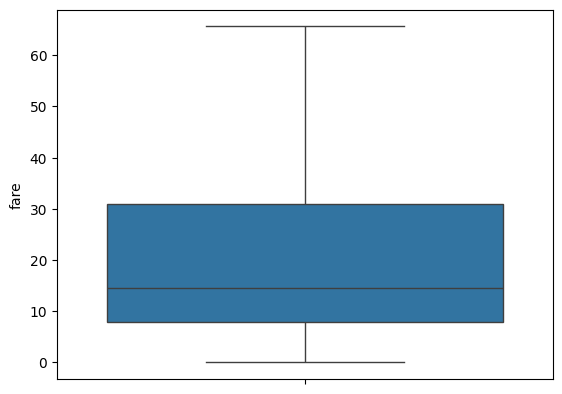

In [82]:
sns.boxplot(y=df['fare'])

#### Step 3: Normalization and Standardization
- Apply:
  - Min-Max Normalization on fare
  - StandardScaler on age (use sklearn)

In [83]:
# Min-Max Normalization on fare
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
# print("Print scaler fit: ",scaler.fit(df[['fare']].head(5)))
df['Norm_fare'] = min_max_scaler.fit_transform(df[['fare']])
print(df[['fare','Norm_fare']].head(5))

      fare  Norm_fare
0   7.2500   0.110460
1  65.6344   1.000000
2   7.9250   0.120745
3  53.1000   0.809027
4   8.0500   0.122649


In [84]:
# StandardScaler on age (use sklearn)
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df['Std_age'] = std_scaler.fit_transform(df[['age']])
print(df[['age','Std_age']].head(5))

    age   Std_age
0  22.0 -0.530377
1  38.0  0.571831
2  26.0 -0.254825
3  35.0  0.365167
4  35.0  0.365167


#### Step 4: Encoding Categorical Variables
Perform the following encodings:
- sex: Label Encoding
- embarked: One-Hot Encoding
- class: Frequency Encoding
- who: Target Encoding (target: survived)
- deck: Binary Encoding

In [85]:
# sex: Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['le_sex'] = le.fit_transform(df['sex'])
print(df[['sex','le_sex']].head(5))

      sex  le_sex
0    male       1
1  female       0
2  female       0
3  female       0
4    male       1


In [86]:
# embarked: One-Hot Encoding
dummydata = pd.get_dummies(df, columns=['embarked'])
print(dummydata[['embarked_C','embarked_Q','embarked_S']].head(5))

   embarked_C  embarked_Q  embarked_S
0       False       False        True
1        True       False       False
2       False       False        True
3       False       False        True
4       False       False        True


In [87]:
# class: Frequency Encoding
freq = df['class'].value_counts()
df['freq_class'] = df['class'].map(freq)
print(df[['class','freq_class']].head(5))

   class freq_class
0  Third        491
1  First        216
2  Third        491
3  First        216
4  Third        491


In [88]:
# who: Target Encoding (target = survived)
target_mean = df.groupby('who')['survived'].mean()
df['target_who'] = df['who'].map(target_mean)
print(df[['who', 'target_who']].head(5))


     who  target_who
0    man    0.163873
1  woman    0.756458
2  woman    0.756458
3  woman    0.756458
4    man    0.163873


In [89]:
# deck: Binary Encoding
!pip install category_encoders
import category_encoders as ce

binary_encoder = ce.BinaryEncoder(cols=['deck'])
df = binary_encoder.fit_transform(df)
print(df.filter(like='deck').head(5))



   deck_0  deck_1  deck_2  deck_3
0       1       0       0       0
1       0       0       0       1
2       1       0       0       0
3       0       0       0       1
4       1       0       0       0


## Exercise3: Feature Selection

#### Target variable: survived
#### Step 1: Pearson Correlation
- Compute correlation among: age, fare, parch, sibsp
- Drop one of any pair with correlation > 0.9

In [90]:
# Step 1: Pearson Correlation
num_features = ['age', 'fare', 'parch', 'sibsp']
corr_matrix = df[num_features].corr()

print("Correlation Matrix:\n", corr_matrix)

# Drop one feature if correlation > 0.9
to_drop = set()
for i in range(len(num_features)):
    for j in range(i+1, len(num_features)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            to_drop.add(num_features[j])

print("Highly correlated features to drop:", to_drop)


Correlation Matrix:
             age      fare     parch     sibsp
age    1.000000  0.151920 -0.189119 -0.308247
fare   0.151920  1.000000  0.292616  0.332021
parch -0.189119  0.292616  1.000000  0.414838
sibsp -0.308247  0.332021  0.414838  1.000000
Highly correlated features to drop: set()


#### Step 2: ANOVA (f_classif)
- Test: sex, embarked, class, who vs survived


In [91]:
from sklearn.feature_selection import f_classif

cat_features = ['sex', 'embarked', 'class', 'who']
X_cat = pd.get_dummies(df[cat_features], drop_first=True)
y = df['survived']

f_values, p_values = f_classif(X_cat, y)

anova_results = pd.DataFrame({"Feature": X_cat.columns,
                              "F-value": f_values,
                              "p-value": p_values})
print("\nANOVA results:\n", anova_results)



ANOVA results:
         Feature     F-value       p-value
0      sex_male  372.405746  1.406055e-69
1    embarked_Q    0.011844  9.133627e-01
2    embarked_S   22.075464  3.036118e-06
3  class_Second    7.814795  5.293684e-03
4   class_Third  103.057582  5.510325e-23
5       who_man  400.037628  8.998056e-74
6     who_woman  306.864785  3.009422e-59


#### Step 3: Chi-Square Test
- Apply on: sex, embarked, class vs survived

In [92]:
from sklearn.feature_selection import chi2

chi_features = ['sex', 'embarked', 'class']
X_chi = pd.get_dummies(df[chi_features], drop_first=True)
y = df['survived']

chi2_stats, chi2_p = chi2(X_chi, y)

chi2_results = pd.DataFrame({"Feature": X_chi.columns,
                             "Chi2": chi2_stats,
                             "p-value": chi2_p})
print("\nChi-Square results:\n", chi2_results)



Chi-Square results:
         Feature       Chi2       p-value
0      sex_male  92.702447  6.077838e-22
1    embarked_Q   0.010847  9.170520e-01
2    embarked_S   5.984840  1.442935e-02
3  class_Second   6.160767  1.306146e-02
4   class_Third  41.553071  1.147141e-10


#### Step 4: SelectKBest
- Use SelectKBest with chi2 and f_classif
- Select top 5 features for predicting survived

In [95]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.impute import SimpleImputer

# Separate numerical & categorical features
num_features = ['age', 'fare', 'parch', 'sibsp']
X_num = df[num_features]
X_cat = pd.get_dummies(df[['sex','embarked','class','who']], drop_first=True).astype(int)

# Handle missing values
imputer_num = SimpleImputer(strategy='mean')

X_num = pd.DataFrame(imputer_num.fit_transform(X_num), columns=num_features)
# (no need to impute X_cat now, as dummies are 0/1 integers without NaNs)

# Final dataset
X = pd.concat([X_num, X_cat], axis=1)
y = df['survived']

# --- SelectKBest with f_classif ---
selector_f = SelectKBest(score_func=f_classif, k=5)
X_new_f = selector_f.fit_transform(X, y)
print("\nTop 5 features by ANOVA f_classif:\n", X.columns[selector_f.get_support()].tolist())

# --- SelectKBest with chi2 ---
selector_chi = SelectKBest(score_func=chi2, k=5)
X_new_chi = selector_chi.fit_transform(abs(X), y)  # chi2 needs non-negative values
print("\nTop 5 features by Chi-Square:\n", X.columns[selector_chi.get_support()].tolist())



Top 5 features by ANOVA f_classif:
 ['fare', 'sex_male', 'class_Third', 'who_man', 'who_woman']

Top 5 features by Chi-Square:
 ['fare', 'sex_male', 'class_Third', 'who_man', 'who_woman']


In [96]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.impute import SimpleImputer
import pandas as pd

# Separate numerical & categorical features
num_features = ['age', 'fare', 'parch', 'sibsp']
X_num = df[num_features]
X_cat = pd.get_dummies(df[['sex','embarked','class','who']], drop_first=True).astype(int)

# Handle missing values
imputer_num = SimpleImputer(strategy='mean')
X_num = pd.DataFrame(imputer_num.fit_transform(X_num), columns=num_features)

# Final dataset
X = pd.concat([X_num, X_cat], axis=1)
y = df['survived']

# --- Select top 5 with f_classif ---
selector_f = SelectKBest(score_func=f_classif, k=5)
selector_f.fit(X, y)
f_results = pd.DataFrame({
    "Feature": X.columns,
    "Score (F)": selector_f.scores_,
    "p-value": selector_f.pvalues_
}).sort_values(by="Score (F)", ascending=False)

print("\nTop 5 features by ANOVA f_classif:\n", f_results.head(5))

# --- Select top 5 with chi2 ---
selector_chi = SelectKBest(score_func=chi2, k=5)
selector_chi.fit(abs(X), y)  # chi2 needs non-negative values
chi_results = pd.DataFrame({
    "Feature": X.columns,
    "Score (Chi2)": selector_chi.scores_,
    "p-value": selector_chi.pvalues_
}).sort_values(by="Score (Chi2)", ascending=False)

print("\nTop 5 features by Chi-Square:\n", chi_results.head(5))



Top 5 features by ANOVA f_classif:
         Feature   Score (F)       p-value
9       who_man  400.037563  8.998259e-74
4      sex_male  372.405724  1.406066e-69
10    who_woman  306.864782  3.009426e-59
8   class_Third  103.057599  5.510281e-23
1          fare   99.614870  2.622660e-22

Top 5 features by Chi-Square:
         Feature  Score (Chi2)       p-value
1          fare   1564.437823  0.000000e+00
10    who_woman    159.095048  1.783910e-36
9       who_man    109.859713  1.051769e-25
4      sex_male     92.702447  6.077838e-22
8   class_Third     41.553071  1.147141e-10
